<center> 
<b> <font size = 8, color = 'grey'>
Laptop Price Analysis
<b/>
<center/>

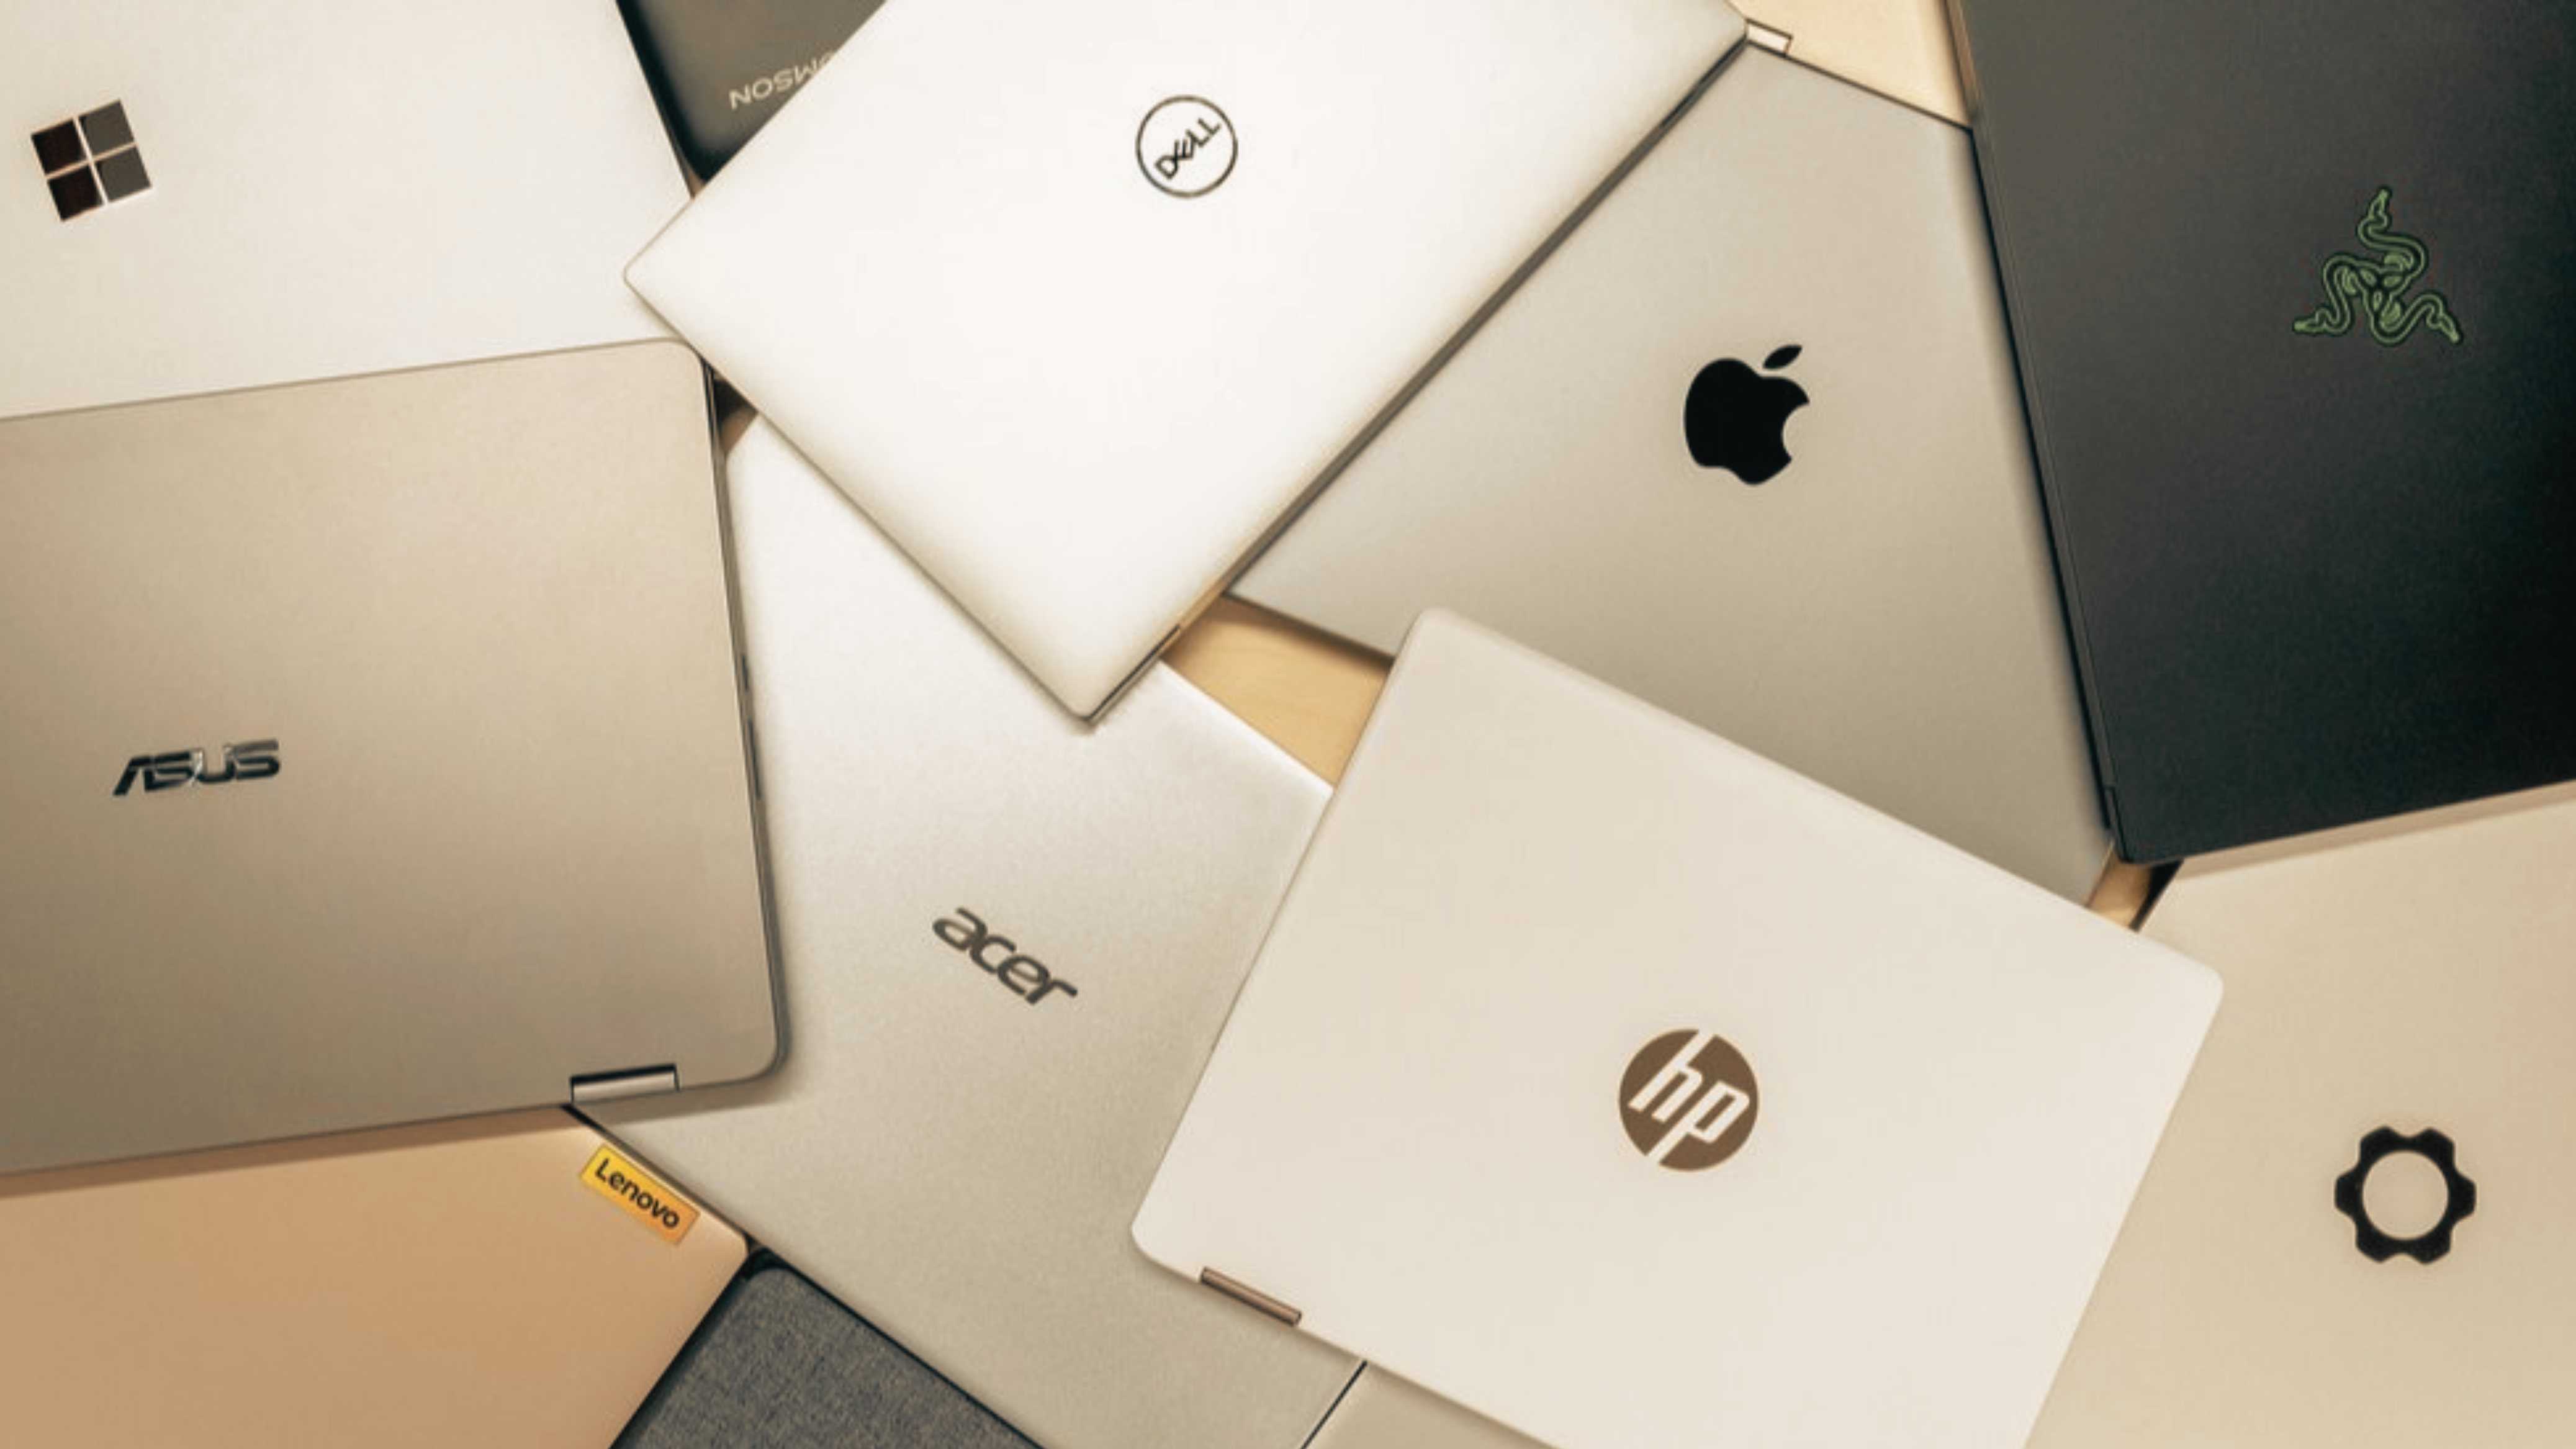

In [1]:
from IPython.display import display, Image
display(Image('LaptopPricesCover.png'))

## Summary

The goal of this project is to analyze the statistical relationship between laptop selling prices and various features, including RAM, brand, operating system, and more. The project commenced with feature engineering to address data cleanliness issues, allowing for effective exploratory data analysis (EDA) and subsequent statistical analysis.

## Main Libraries and Modules

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
import regex as re

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Preprocessing and Statistical Modeling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# Ignoring warnings
from warnings import filterwarnings as fw
fw('ignore')

## Data Preparation

In [3]:
# Reading the csv file

df = pd.read_csv('LaptopPricesDataset.csv')
df.head()

Name  \
0  Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...   
1  Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...   
2  HP Pentium Quad Core - (8 GB/256 GB SSD/Window...   
3  HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...   
4  HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...   

                            Processor            RAM  \
0  Intel Core i5 Processor (10th Gen)  8 GB DDR4 RAM   
1  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
2   Intel Pentium Quad Core Processor  8 GB DDR4 RAM   
3  Intel Core i3 Processor (11th Gen)  8 GB DDR4 RAM   
4      AMD Athlon Dual Core Processor  4 GB DDR4 RAM   

                     Operating System     Storage  \
0  64 bit Windows 10 Operating System    1 TB HDD   
1  64 bit Windows 10 Operating System  256 GB SSD   
2  64 bit Windows 10 Operating System  256 GB SSD   
3  64 bit Windows 10 Operating System  256 GB SSD   
4  64 bit Windows 10 Operating System    1 TB HDD   

                        Display                Warranty    Price  Rating  
0  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty  ₹43,990     3.9  
1    35.56 cm (14 Inch) Display  1 Year Onsite Warranty  ₹43,990     4.2  
2    35.56 cm (14 inch) Display  1 Year Onsite Warranty  ₹31,490     4.6  
3    35.56 cm (14 inch) Display  1 Year Onsite Warranty  ₹40,990     4.1  
4  39.62 cm (15.6 inch) Display  1 Year Onsite Warranty  ₹27,490     4.1

In [4]:
# Passing attributes to lower case, and replacing white spaces (' ') with underscores ('_')

df.columns = [i.lower().replace(' ', '_') for i in df.columns]
df.columns

Index(['name', 'processor', 'ram', 'operating_system', 'storage', 'display',
       'warranty', 'price', 'rating'],
      dtype='object')

* Feature Engineering

1. Brand 

In [5]:
# Extracting the brand part from the name column records and assigning it to a new dataframe

brand_series = (df.name.map(lambda col: col.split()[0])).map(lambda cell: cell.title() if cell.islower() else cell)
df_prep = pd.DataFrame(brand_series.values, columns = ['brand'])
print(set(df_prep.brand.values))

{'Nokia', 'Nexstgo', 'Vaio', 'MICROSOFT', 'MSI', 'DELL', 'Lenovo', 'ALIENWARE', 'Avita', 'LG', 'ASUS', 'APPLE', 'HP', 'Acer'}


2. Model

In [6]:
# Record i name column containing and (not) the 'Core' word

df.name.str.contains('core', case = False).sum(), df[~df.name.str.contains('core', case = False)].name.count()

(541, 9)

In [7]:
# Patterns for model attributes

pattern_1 = '\w{2,9}\s([\w\d\s()]+?)\s?(?:Quad|Dual|Octa|Hexa)?\sCore'
pattern_2 = r'\w{1,9}\s([\d\w\s]+?)\s-'

In [8]:
# Function to extract the model part

extract_model = lambda col: (
    df[col].str.extract(pattern_1)[0]
    if df[col].str.contains('Core').any()
    else df[col].str.extract(pattern_2)[0]
)

In [9]:
# Extracting the model part

model_series = extract_model('name')
df_prep['model'] = model_series
print(df_prep.model.unique())

['Ideapad S145' 'IdeaPad' 'Pentium' '14s' '15s Athlon' 'IdeaPad 3'
 'Pavilion Gaming Ryzen 5' 'Predator Helios 300' 'VivoBook 15'
 '15s Ryzen 3' 'Vivobook Gaming' 'GL65 Leopard' 'Aspire 7 Ryzen 5' '15s'
 'Cosmos 2 in 1 Celeron' 'Ryzen 3' 'Legion' 'IdeaPad Ryzen 7'
 'VivoBook Ultra 14' 'Aspire 7' nan 'GF63 Thin' 'IdeaPad Gaming Ryzen 5'
 '15s Ryzen 5' 'VivoBook S S13' 'Pavilion' 'Ideapad S145 Ryzen 3'
 'Celeron' 'TUF Dash F15 (2021)' 'Bravo 15 Ryzen 5' 'ROG Strix G15'
 'Pavilion Gaming Ryzen 7' 'GP65 Leopard' 'Envy x360' 'IdeaPad Gaming 3i'
 'Pavilion x360' '14s Ryzen 5' 'IdeaPad Gaming 3 Ryzen 7'
 'ROG Strix G15 Ryzen 5' 'Modern 14 Ryzen 5' 'Liber' 'MacBook Air'
 'MacBook Pro with Touch Bar' 'ROG Strix G15 (2020)' 'Inspiron'
 'Legion Y540' 'VivoBook 14 Ryzen 5' 'ROG Strix G15 (2021) Ryzen 9'
 'IdeaPad Gaming 3' 'VivoBook 14 Ryzen 7' 'Ideapad 5 Ryzen 7'
 'ROG Flow X13 Ryzen 9' 'MacBook Pro' 'Thinkpad E14' 'Predator'
 'ROG Flow X13 Ryzen 7' 'Vostro' 'Ryzen 5' 'Ideapad Flex 5' 'Gram 14'
 

3. Processor

In [10]:
# Extracting the main processor information, and presenting its unique instances

processor_series = df.processor.map(lambda cell: re.split(r'processor', cell, flags = re.IGNORECASE)[0])

processor_series.unique()

array(['Intel Core i5 ', 'Intel Core i3 ', 'Intel Pentium Quad Core ',
       'AMD Athlon Dual Core ', 'AMD Ryzen 5 Quad Core ',
       'Intel Core i7 ', 'AMD Ryzen 3 Dual Core ',
       'Intel Celeron Dual Core ', 'AMD Ryzen 7 Octa Core ',
       'AMD Ryzen 5 Hexa Core ', 'AMD Ryzen 3 Quad Core ',
       'AMD Ryzen 9 Octa Core ', 'Intel Core i9 ',
       'AMD Ryzen 7 Quad Core ', 'AMD Dual Core ',
       'AMD Ryzen 5 Dual Core ', 'AMD APU Dual Core A6 ',
       'Microsoft Core i5 ', 'AMD Ryzen 7 Hexa Core ',
       'Intel Evo platform feat 11th Gen Intel Core i5 ',
       'Intel Evo platform feat 11th Gen Intel Core i7 ',
       'AMD APU Dual Core A4 '], dtype=object)

In [11]:
# Updating the column values in the new dataframe

df_prep['processor'] = pd.DataFrame(processor_series.values, columns = ['processor'])
df_prep.processor.unique()

array(['Intel Core i5 ', 'Intel Core i3 ', 'Intel Pentium Quad Core ',
       'AMD Athlon Dual Core ', 'AMD Ryzen 5 Quad Core ',
       'Intel Core i7 ', 'AMD Ryzen 3 Dual Core ',
       'Intel Celeron Dual Core ', 'AMD Ryzen 7 Octa Core ',
       'AMD Ryzen 5 Hexa Core ', 'AMD Ryzen 3 Quad Core ',
       'AMD Ryzen 9 Octa Core ', 'Intel Core i9 ',
       'AMD Ryzen 7 Quad Core ', 'AMD Dual Core ',
       'AMD Ryzen 5 Dual Core ', 'AMD APU Dual Core A6 ',
       'Microsoft Core i5 ', 'AMD Ryzen 7 Hexa Core ',
       'Intel Evo platform feat 11th Gen Intel Core i5 ',
       'Intel Evo platform feat 11th Gen Intel Core i7 ',
       'AMD APU Dual Core A4 '], dtype=object)

4. RAM Capacity

In [12]:
# Distinct RAMs

df.ram.unique()

array(['8 GB DDR4 RAM', '4 GB DDR4 RAM', '16 GB DDR4 RAM',
       '8 GB LPDDR4X RAM', '8 GB LPDDR3 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR3 RAM', '8 GB DDR3 RAM',
       '16 GB DDR3 RAM', '32 GB DDR4 RAM', '4 GB DDR3 RAM',
       '12 GB DDR4 RAM'], dtype=object)

In [13]:
# Inserting the RAM column

df_prep['ram_capacity'] = df.ram.str.extract(r'(\d+)\sGB').astype(int)
set(df_prep.ram_capacity)

{4, 8, 12, 16, 32}

5. RAM Type

In [14]:
# Insterting the RAM type column

df_prep['ram_type'] = df.ram.map(lambda cell: cell.split()[2])
df_prep.ram_type.unique()

array(['DDR4', 'LPDDR4X', 'LPDDR3', 'DDR3'], dtype=object)

6. Operating System

In [15]:
# Unique operating system

df.operating_system.unique()

array(['64 bit Windows 10 Operating System', 'Mac OS Operating System',
       'Windows 10 Operating System',
       'Pre-installed Genuine Windows 10 Operating System (Includes Built-in Security, Free Automated Updates, Latest Features)',
       'DOS Operating System', '64 bit Chrome Operating System'],
      dtype=object)

In [16]:
# Updating the OS column

os_series = df.operating_system.str.extract('[-\w\s]*?(\w+)\s[\s\dA-Z]*?Operating System')
df_prep['operating_system'] = os_series
df_prep.iloc[:,-1].value_counts()

operating_system
Windows    525
Mac         20
Chrome       3
DOS          2
Name: count, dtype: int64

7. Storage Capacity

In [17]:
# Unique Storage information

df.storage.unique()

array(['1 TB HDD', '256 GB SSD', '1 TB HDD|256 GB SSD', '512 GB SSD',
       '1 TB SSD', '2 TB SSD', '128 GB NVMe PCIe 3.0 x4 SSD',
       '1 TB HDD|128 GB SSD', '128 GB SSD',
       '512 GB SSD for Reduced Boot Up Time and in Game Loading',
       '1 TB HDD|512 GB SSD',
       '128 GB SSD for Reduced Boot Up Time and in Game Loading',
       '512 GB HDD|512 GB SSD'], dtype=object)

In [18]:
# Conversion from TB to GB

storage_capacity_series = df.storage.str.replace(' TB', '024 GB')
print(set(storage_capacity_series))

{'256 GB SSD', '128 GB NVMe PCIe 3.0 x4 SSD', '1024 GB HDD|512 GB SSD', '1024 GB SSD', '512 GB SSD', '128 GB SSD', '512 GB HDD|512 GB SSD', '2024 GB SSD', '1024 GB HDD|256 GB SSD', '128 GB SSD for Reduced Boot Up Time and in Game Loading', '1024 GB HDD|128 GB SSD', '1024 GB HDD', '512 GB SSD for Reduced Boot Up Time and in Game Loading'}


In [19]:
# Extracting the capacity information

storage_capacity_series = storage_capacity_series.str.findall(r'(\d{1,4})\sGB')
storage_capacity_series

0           [1024]
1            [256]
2            [256]
3            [256]
4           [1024]
          ...     
545          [256]
546    [1024, 256]
547    [1024, 512]
548          [512]
549    [1024, 256]
Name: storage, Length: 550, dtype: object

In [20]:
# Summing the storage capacity

sum_capacity = lambda cell: np.array(cell).astype(int).sum()
df_prep['storage_capacity'] = storage_capacity_series.map(sum_capacity)
set(df_prep.storage_capacity)

{128, 256, 512, 1024, 1152, 1280, 1536, 2024}

8. Storage Type

In [21]:
# Extracting the storage type information

storage_type_series = df.storage.map(lambda cell: 
               'Hybrid' if '|' in cell
               else re.split(r'([SHD]+)', cell, re.IGNORECASE)[1])
storage_type_series.unique()

array(['HDD', 'SSD', 'Hybrid'], dtype=object)

In [22]:
# Inserting the series values in the dataframe

df_prep['storage_type'] = storage_type_series
df_prep.head()

brand         model                 processor  ram_capacity ram_type  \
0  Lenovo  Ideapad S145            Intel Core i5              8     DDR4   
1  Lenovo       IdeaPad            Intel Core i3              8     DDR4   
2      HP       Pentium  Intel Pentium Quad Core              8     DDR4   
3      HP           14s            Intel Core i3              8     DDR4   
4      HP    15s Athlon     AMD Athlon Dual Core              4     DDR4   

  operating_system  storage_capacity storage_type  
0          Windows              1024          HDD  
1          Windows               256          SSD  
2          Windows               256          SSD  
3          Windows               256          SSD  
4          Windows              1024          HDD

9. Display

In [23]:
# Unique display types

print(df.display.unique())

['39.62 cm (15.6 inch) Display' '35.56 cm (14 Inch) Display'
 '35.56 cm (14 inch) Display'
 'Matrix Display, Dragon Center, Cooler Boost 5, Nahimic 3'
 '29.46 cm (11.6 inch) Touchscreen Display' '33.78 cm (13.3 inch) Display'
 '15.6 inches Full HD IPS Thin Bezel Display (144Hz, 45% NTSC Color Gamut)'
 'SHIFT, SteelSeries Engine 3, Matrix Display (Extend), Dragon Center, GamingMode, VR Ready, Cooler Boost 5, Nahimic 3, Nahimic VR, Giant Speaker'
 '33.78 cm (13.3 inch) Touchscreen Display'
 '15.6 inches Full HD IPS Thin Bezel Display (60Hz, 45% NTSC Color Gamut)'
 '35.56 cm (14 inch) Touchscreen Display' '33.02 cm (13 inch) Display'
 '39.62 cm (15.6 Inch) Display' '34.04 cm (13.4 inch) Touchscreen Display'
 '40.64 cm (16 inch) Display' '31.24 cm (12.3 inch) Touchscreen Display'
 '35.56 cm (14 inches) Touchscreen Display'
 '39.62 cm (15.6 inch) Touchscreen Display' '38.1 cm (15 inch) Display'
 '34.54 cm (13.6 inch) Touchscreen Display' '43.94 cm (17.3 inch) Display'
 '34.29 cm (13.5 inch)

In [24]:
# Updating the display column

display_series = df.display.map(lambda cell: re.findall(r'(\d{2}[.\s\d]+)inch', cell, flags = re.IGNORECASE)[0] if 'nch' in cell
              else cell)
df_prep['display'] = display_series
print(set(df_prep.display))

{'17.3 ', '10.1 ', '13.4 ', '13 ', '16 ', '13.6 ', 'Matrix Display, Dragon Center, Cooler Boost 5, Nahimic 3', '14 ', '13.3 ', '11.6 ', '10 ', 'Full HD LED Backlit Anti-glare Display for Better Visual Experience', '15 ', '13.5 ', '15.6 ', '12.3 ', '12 ', 'SHIFT, SteelSeries Engine 3, Matrix Display (Extend), Dragon Center, GamingMode, VR Ready, Cooler Boost 5, Nahimic 3, Nahimic VR, Giant Speaker', 'Full HD LED Backlit Display'}


In [25]:
# Removing extra white spaces

df_prep['display'] = df_prep.display.map(lambda cell: cell.split()[0] if cell[:2].isnumeric() else 'other')
df_prep.display.unique()

array(['15.6', '14', 'other', '11.6', '13.3', '13', '13.4', '16', '12.3',
       '15', '13.6', '17.3', '13.5', '12', '10.1', '10'], dtype=object)

10. Touch

In [26]:
# Inserting a column for touch attribute

touch_series = df.display.map(lambda cell: 'No' if 'Touch' in cell else 'Yes')
df_prep['touch'] = touch_series
df_prep.touch.value_counts()

touch
Yes    494
No      56
Name: count, dtype: int64

11. Price

In [27]:
# Cleaning the price column

df_prep['price'] = df.price.map(lambda cell: float(cell.strip('₹').replace(',', '')))
df_prep

brand                 model                 processor  ram_capacity  \
0    Lenovo          Ideapad S145            Intel Core i5              8   
1    Lenovo               IdeaPad            Intel Core i3              8   
2        HP               Pentium  Intel Pentium Quad Core              8   
3        HP                   14s            Intel Core i3              8   
4        HP            15s Athlon     AMD Athlon Dual Core              4   
..      ...                   ...                       ...           ...   
545    ASUS  ASUS TUF Dash Series    AMD Ryzen 7 Octa Core              8   
546    ASUS               Ryzen 3            Intel Core i7             16   
547     MSI          GL65 Leopard    AMD Ryzen 7 Quad Core              4   
548      HP              Pavilion    AMD Ryzen 7 Octa Core             16   
549    DELL      GAMING G5 SERIES            Intel Core i5             12   

    ram_type operating_system  storage_capacity storage_type display touch  \
0       DDR4          Windows              1024          HDD    15.6   Yes   
1       DDR4          Windows               256          SSD      14   Yes   
2       DDR4          Windows               256          SSD      14   Yes   
3       DDR4          Windows               256          SSD      14   Yes   
4       DDR4          Windows              1024          HDD    15.6   Yes   
..       ...              ...               ...          ...     ...   ...   
545     DDR4          Windows               256          SSD   other   Yes   
546     DDR4          Windows              1280       Hybrid      14    No   
547     DDR4          Windows              1536       Hybrid    13.3   Yes   
548     DDR4          Windows               512          SSD    15.6   Yes   
549     DDR4          Windows              1280       Hybrid      14   Yes   

        price  
0     43990.0  
1     43990.0  
2     31490.0  
3     40990.0  
4     27490.0  
..        ...  
545  136990.0  
546   37900.0  
547  109990.0  
548  122000.0  
549   79990.0  

[550 rows x 11 columns]

12. Rating

In [28]:
# inserting the rating records in the penultimate column

df_prep.insert(df_prep.shape[-1]-1, 'rating', df.rating.values)
df_prep

brand                 model                 processor  ram_capacity  \
0    Lenovo          Ideapad S145            Intel Core i5              8   
1    Lenovo               IdeaPad            Intel Core i3              8   
2        HP               Pentium  Intel Pentium Quad Core              8   
3        HP                   14s            Intel Core i3              8   
4        HP            15s Athlon     AMD Athlon Dual Core              4   
..      ...                   ...                       ...           ...   
545    ASUS  ASUS TUF Dash Series    AMD Ryzen 7 Octa Core              8   
546    ASUS               Ryzen 3            Intel Core i7             16   
547     MSI          GL65 Leopard    AMD Ryzen 7 Quad Core              4   
548      HP              Pavilion    AMD Ryzen 7 Octa Core             16   
549    DELL      GAMING G5 SERIES            Intel Core i5             12   

    ram_type operating_system  storage_capacity storage_type display touch  \
0       DDR4          Windows              1024          HDD    15.6   Yes   
1       DDR4          Windows               256          SSD      14   Yes   
2       DDR4          Windows               256          SSD      14   Yes   
3       DDR4          Windows               256          SSD      14   Yes   
4       DDR4          Windows              1024          HDD    15.6   Yes   
..       ...              ...               ...          ...     ...   ...   
545     DDR4          Windows               256          SSD   other   Yes   
546     DDR4          Windows              1280       Hybrid      14    No   
547     DDR4          Windows              1536       Hybrid    13.3   Yes   
548     DDR4          Windows               512          SSD    15.6   Yes   
549     DDR4          Windows              1280       Hybrid      14   Yes   

     rating     price  
0       3.9   43990.0  
1       4.2   43990.0  
2       4.6   31490.0  
3       4.1   40990.0  
4       4.1   27490.0  
..      ...       ...  
545     4.9  136990.0  
546     3.9   37900.0  
547     3.5  109990.0  
548     4.5  122000.0  
549     4.1   79990.0  

[550 rows x 12 columns]

## Exploratory Data Analysis

In [29]:
# Main information of the dataset

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             550 non-null    object 
 1   model             503 non-null    object 
 2   processor         550 non-null    object 
 3   ram_capacity      550 non-null    int32  
 4   ram_type          550 non-null    object 
 5   operating_system  550 non-null    object 
 6   storage_capacity  550 non-null    int32  
 7   storage_type      550 non-null    object 
 8   display           550 non-null    object 
 9   touch             550 non-null    object 
 10  rating            550 non-null    float64
 11  price             550 non-null    float64
dtypes: float64(2), int32(2), object(8)
memory usage: 47.4+ KB


In [30]:
# It can be tricky to impute any value for missing values in model column. Thus, we'll drop all of them.

df_prep.dropna(inplace = True)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 0 to 549
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             503 non-null    object 
 1   model             503 non-null    object 
 2   processor         503 non-null    object 
 3   ram_capacity      503 non-null    int32  
 4   ram_type          503 non-null    object 
 5   operating_system  503 non-null    object 
 6   storage_capacity  503 non-null    int32  
 7   storage_type      503 non-null    object 
 8   display           503 non-null    object 
 9   touch             503 non-null    object 
 10  rating            503 non-null    float64
 11  price             503 non-null    float64
dtypes: float64(2), int32(2), object(8)
memory usage: 47.2+ KB


In [31]:
# Lists for categoric and numeric columns

cat_cols = list(df_prep.dtypes[df_prep.dtypes.values == object].index)
num_cols = list(df_prep.dtypes[df_prep.dtypes.values != object].index)

- Numeric Values

In [32]:
# Statistical summary for numeric values

df_num = df_prep[num_cols]
df_num.describe()

ram_capacity  storage_capacity      rating          price
count    503.000000        503.000000  503.000000     503.000000
mean      10.115308        758.791252    4.274950   80220.013917
std        4.821373        373.298170    0.720453   42252.404446
min        4.000000        128.000000    1.000000   17990.000000
25%        8.000000        512.000000    4.000000   47790.000000
50%        8.000000        512.000000    4.400000   67551.000000
75%       16.000000       1024.000000    4.600000  104990.000000
max       32.000000       2024.000000    5.000000  338990.000000

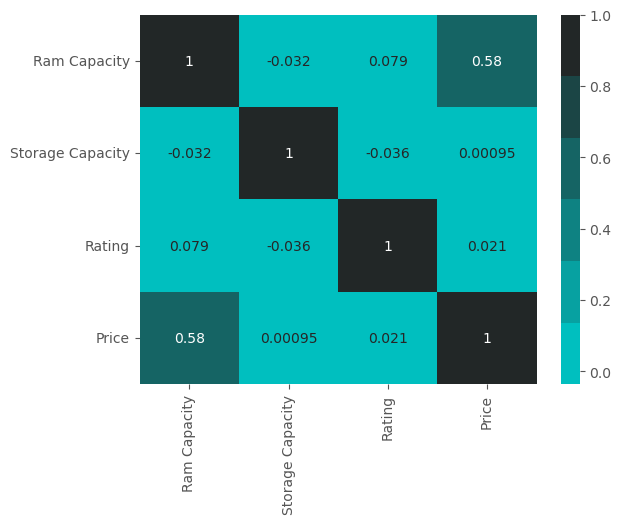

In [33]:
# Correlation Heatmap

tick_formatting = [i.title().replace('_', ' ') for i in num_cols]
c_map = sns.dark_palette('c', reverse = True)
sns.heatmap(data = df_num.corr(), annot = True, cmap = c_map, 
            yticklabels = tick_formatting,
            xticklabels = tick_formatting)
plt.show()

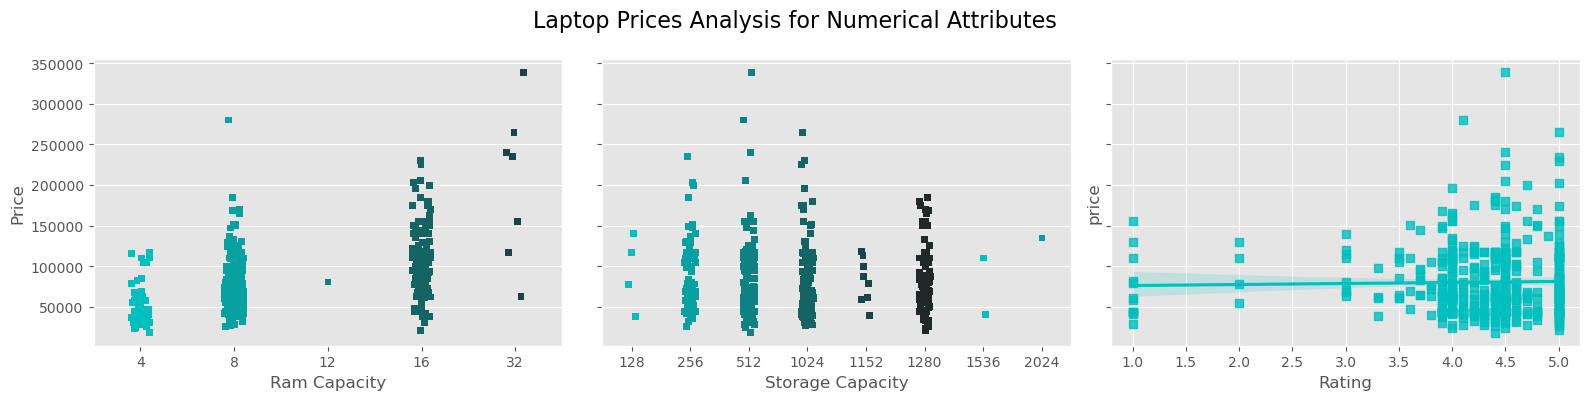

In [34]:
# Numerical attributes distribution against laptop prices

fig, axes = plt.subplots(ncols = 3, figsize = (16, 4), sharey = True)

for i, ax in enumerate(axes.flatten()): 
    if num_cols[i] != 'rating':
        sns.stripplot(data = df_num, x = num_cols[i], y = 'price', marker = 's', palette = c_map, ax = ax)
        ax.set_xlabel(tick_formatting[i])
        ax.set_ylabel(tick_formatting[-1])
    else:
        sns.regplot(data = df_num, x = num_cols[i], 
                    y = 'price',  marker = 's', color = 'c', ax = ax)
        ax.set_xlabel(tick_formatting[i])
plt.suptitle('Laptop Prices Analysis for Numerical Attributes', fontsize = 16, y = .99)
plt.tight_layout()
plt.show()

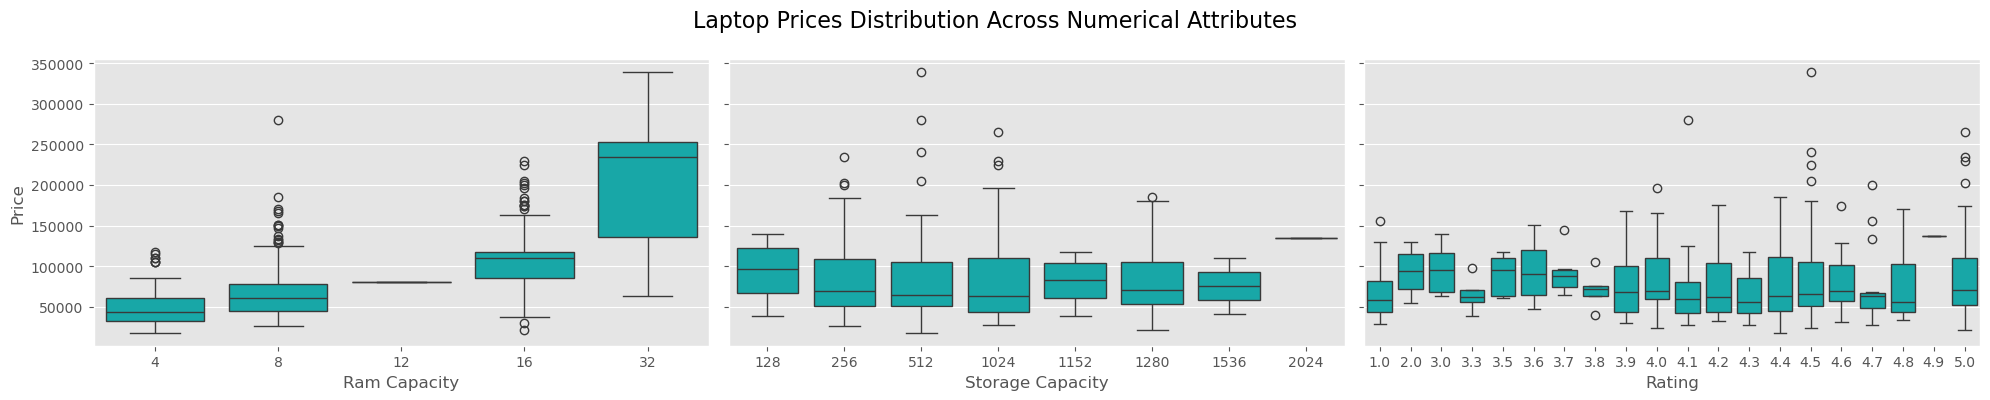

In [35]:
# Numeric attributes dispersion by prices

fig, axes = plt.subplots(ncols = 3, figsize = (20, 4), sharey = True)

for i, ax in enumerate(axes.flatten()): 
    sns.boxplot(data = df_num, x = num_cols[i], y = 'price', color = 'c', ax = ax)
    ax.set_xlabel(tick_formatting[i])
    ax.set_ylabel(tick_formatting[-1])
plt.suptitle('Laptop Prices Distribution Across Numerical Attributes', fontsize = 16, y = .99)
plt.tight_layout()
plt.show()

- Categoric Attributes

In [36]:
# Statistical summary for categoric attributes

df_cat_stat = df_prep[cat_cols].describe()
df_cat_stat

brand    model       processor ram_type operating_system  \
count      503      503             503      503              503   
unique      12      178              22        4                4   
top     Lenovo  IdeaPad  Intel Core i5      DDR4          Windows   
freq       138       41             196      451              486   

       storage_type display touch  
count           503     503   503  
unique            3      16     2  
top             SSD    15.6   Yes  
freq            327     243   455

In [37]:
# List and dataframe of categorical columns to plot

cat_cols_plot = list(df_cat_stat.T[df_cat_stat.T.unique < 15].index) + ['price']
df_cat_plot = df_prep[cat_cols_plot]
df_cat_plot

brand ram_type operating_system storage_type touch     price
0    Lenovo     DDR4          Windows          HDD   Yes   43990.0
1    Lenovo     DDR4          Windows          SSD   Yes   43990.0
2        HP     DDR4          Windows          SSD   Yes   31490.0
3        HP     DDR4          Windows          SSD   Yes   40990.0
4        HP     DDR4          Windows          HDD   Yes   27490.0
..      ...      ...              ...          ...   ...       ...
545    ASUS     DDR4          Windows          SSD   Yes  136990.0
546    ASUS     DDR4          Windows       Hybrid    No   37900.0
547     MSI     DDR4          Windows       Hybrid   Yes  109990.0
548      HP     DDR4          Windows          SSD   Yes  122000.0
549    DELL     DDR4          Windows       Hybrid   Yes   79990.0

[503 rows x 6 columns]

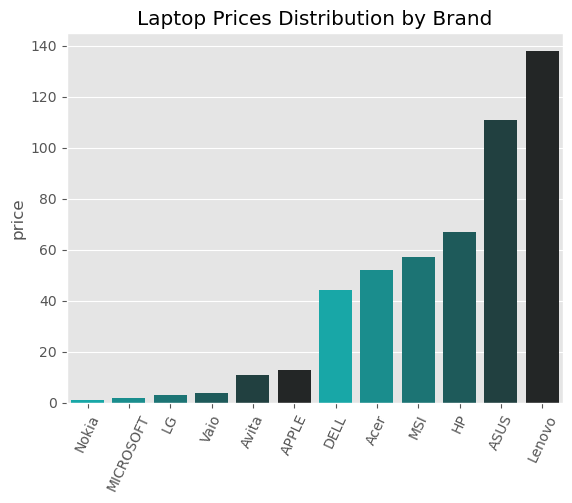

In [38]:
# Prices distribution across laptop brands

sns.barplot(data = df_cat_plot[['brand', 'price']].groupby('brand').count().sort_values('price'), 
            x = 'brand', y = 'price', color = 'c', errorbar = None, palette = c_map)
plt.xticks(rotation = 65)
plt.xlabel('')

plt.title('Laptop Prices Distribution by Brand')
plt.show()

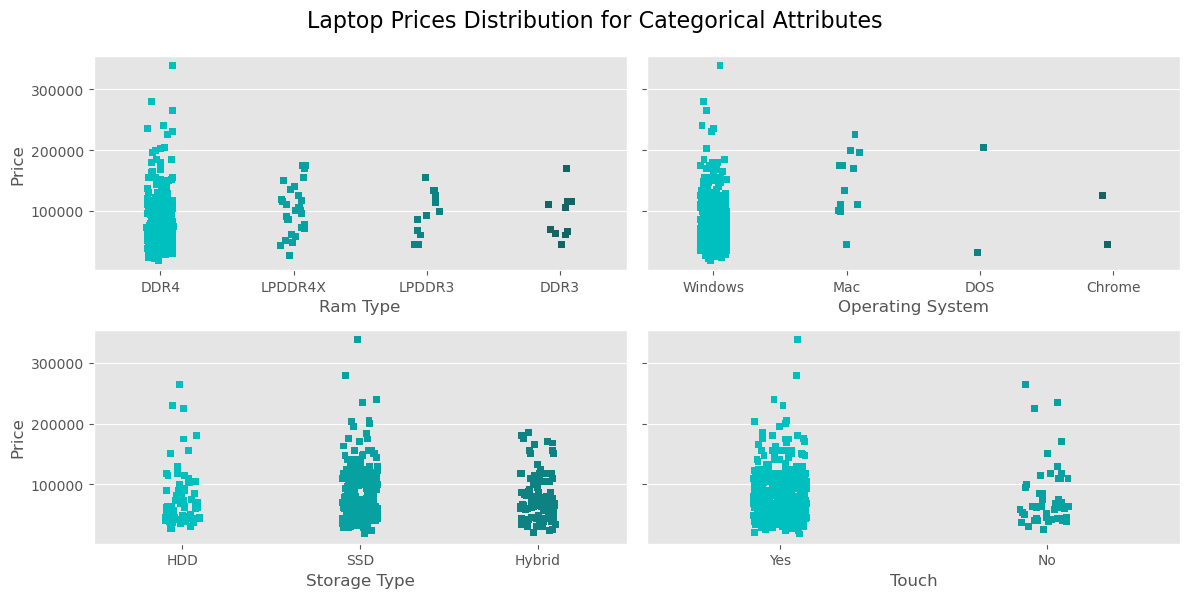

In [39]:
# Laptop prices distribution on categorical attributes

fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (12, 6), sharey = True)
tick_formatting_cat = [i.title().replace('_', ' ') for i in cat_cols_plot[1:]]

for i, ax in enumerate(axes.flatten()): 
    sns.stripplot(data = df_cat_plot.iloc[:, 1 :], x = cat_cols_plot[1:][i], 
                  y = 'price', marker = 's', palette = c_map, ax = ax)
    ax.set_xlabel(tick_formatting_cat[i])
    ax.set_ylabel(tick_formatting_cat[-1])
plt.suptitle('Laptop Prices Distribution for Categorical Attributes', fontsize = 16, y = .99)
plt.tight_layout()
plt.show()

## Statistical Modeling

In [40]:
# Dependent and independent variables

X, y = df_prep.drop('price', axis = 1), df_prep.price

In [41]:
# Pipeline for scaling and transform categorical variables to dummies

transformer = ColumnTransformer(transformers = [
    ('scler', RobustScaler(), num_cols[:-1]),
    ('ohenc', OneHotEncoder(drop = 'first', sparse_output = False), cat_cols)
     ])

X_transf = transformer.fit_transform(X)
X_transf

array([[ 0.        ,  1.        , -0.83333333, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.5       , -0.33333333, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , -0.5       ,  0.33333333, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.5       ,  2.        , -1.5       , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.        ,  0.16666667, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.5       ,  1.5       , -0.5       , ...,  0.        ,
         0.        ,  1.        ]])

In [42]:
# Columns after preprocessing

prefix_size = len('ohenc'+'_') + 1
cols_transf = [i[prefix_size:] for i in transformer.get_feature_names_out()]
print(cols_transf)

['ram_capacity', 'storage_capacity', 'rating', 'brand_ASUS', 'brand_Acer', 'brand_Avita', 'brand_DELL', 'brand_HP', 'brand_LG', 'brand_Lenovo', 'brand_MICROSOFT', 'brand_MSI', 'brand_Nokia', 'brand_Vaio', 'model_14a Celeron', 'model_14s', 'model_14s Ryzen 5', 'model_15', 'model_15s', 'model_15s Athlon', 'model_15s Ryzen 3', 'model_15s Ryzen 5', 'model_250 G7', 'model_3501', 'model_APU', 'model_ASUS TUF Dash Series', 'model_Aspire 3 Ryzen 3', 'model_Aspire 5', 'model_Aspire 5 Ryzen 5', 'model_Aspire 7', 'model_Aspire 7 Ryzen 5', 'model_Bravo 15 Ryzen 5', 'model_Celeron', 'model_ConceptD 5', 'model_Cosmos 2 in 1 Celeron', 'model_Creator 17', 'model_E Series Ryzen 5', 'model_E Series Ryzen 7', 'model_Envy', 'model_Envy x360', 'model_Envy x360 Ryzen 5', 'model_ExpertBook B9', 'model_ExpertBook P1', 'model_ExpertBook P2', 'model_G3', 'model_G7', 'model_GAMING G5 SERIES', 'model_GE75 Raider', 'model_GF63 Thin', 'model_GF65 Thin', 'model_GL', 'model_GL65 Leopard', 'model_GP65 Leopard', 'model

In [43]:
# Preprocessed dataframe for independent set

X_ohe = pd.DataFrame(X_transf, columns = cols_transf)
X_ohe.index = y.index # indexes alignment
X_ohe

ram_capacity  storage_capacity    rating  brand_ASUS  brand_Acer  \
0             0.0               1.0 -0.833333         0.0         0.0   
1             0.0              -0.5 -0.333333         0.0         0.0   
2             0.0              -0.5  0.333333         0.0         0.0   
3             0.0              -0.5 -0.500000         0.0         0.0   
4            -0.5               1.0 -0.500000         0.0         0.0   
..            ...               ...       ...         ...         ...   
545           0.0              -0.5  0.833333         1.0         0.0   
546           1.0               1.5 -0.833333         1.0         0.0   
547          -0.5               2.0 -1.500000         0.0         0.0   
548           1.0               0.0  0.166667         0.0         0.0   
549           0.5               1.5 -0.500000         0.0         0.0   

     brand_Avita  brand_DELL  brand_HP  brand_LG  brand_Lenovo  ...  \
0            0.0         0.0       0.0       0.0           1.0  ...   
1            0.0         0.0       0.0       0.0           1.0  ...   
2            0.0         0.0       1.0       0.0           0.0  ...   
3            0.0         0.0       1.0       0.0           0.0  ...   
4            0.0         0.0       1.0       0.0           0.0  ...   
..           ...         ...       ...       ...           ...  ...   
545          0.0         0.0       0.0       0.0           0.0  ...   
546          0.0         0.0       0.0       0.0           0.0  ...   
547          0.0         0.0       0.0       0.0           0.0  ...   
548          0.0         0.0       1.0       0.0           0.0  ...   
549          0.0         1.0       0.0       0.0           0.0  ...   

     display_13.4  display_13.5  display_13.6  display_14  display_15  \
0             0.0           0.0           0.0         0.0         0.0   
1             0.0           0.0           0.0         1.0         0.0   
2             0.0           0.0           0.0         1.0         0.0   
3             0.0           0.0           0.0         1.0         0.0   
4             0.0           0.0           0.0         0.0         0.0   
..            ...           ...           ...         ...         ...   
545           0.0           0.0           0.0         0.0         0.0   
546           0.0           0.0           0.0         1.0         0.0   
547           0.0           0.0           0.0         0.0         0.0   
548           0.0           0.0           0.0         0.0         0.0   
549           0.0           0.0           0.0         1.0         0.0   

     display_15.6  display_16  display_17.3  display_other  touch_Yes  
0             1.0         0.0           0.0            0.0        1.0  
1             0.0         0.0           0.0            0.0        1.0  
2             0.0         0.0           0.0            0.0        1.0  
3             0.0         0.0           0.0            0.0        1.0  
4             1.0         0.0           0.0            0.0        1.0  
..            ...         ...           ...            ...        ...  
545           0.0         0.0           0.0            1.0        1.0  
546           0.0         0.0           0.0            0.0        0.0  
547           0.0         0.0           0.0            0.0        1.0  
548           1.0         0.0           0.0            0.0        1.0  
549           0.0         0.0           0.0            0.0        1.0  

[503 rows x 236 columns]

In [44]:
# Fitting the model and displaying the statistical summary

X_ohe_const = sm.add_constant(X_ohe)
model = sm.OLS(y, X_ohe_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     25.31
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          3.80e-115
Time:                        00:11:42   Log-Likelihood:                -5304.4
No. Observations:                 503   AIC:                         1.105e+04
Df Residuals:                     280   BIC:                         1.200e+04
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [45]:
# Creating a DataFrame to hold the VIF values

df_vif = pd.DataFrame()
df_vif['features'] = X_ohe.columns
df_vif['vif'] = [VIF(X_ohe.values, i) for i in range(X_ohe.shape[1])]

In [46]:
# Identifying features with high VIF (given 5 as the threshold)

vif_threshold = 5
high_vif_features = df_vif[df_vif['vif'] > vif_threshold]

print(high_vif_features)

             features         vif
1    storage_capacity    5.458702
3          brand_ASUS         inf
4          brand_Acer         inf
5         brand_Avita         inf
6          brand_DELL         inf
..                ...         ...
229        display_14  143.094742
231      display_15.6  167.771173
232        display_16    6.120184
233      display_17.3    5.287535
234     display_other   41.011786

[125 rows x 2 columns]


In [47]:
# Dropping features with high VIFs

features_to_drop = high_vif_features['features'].tolist()
X_vfi = X_ohe.drop(columns = features_to_drop)

print(f'Features with high VIFs: {len(features_to_drop)}\nFeatures Now: {len(X_vfi.columns)}')

Features with high VIFs: 125
Features Now: 111


In [48]:
# Fitting the model with the selected columns and displaying the statistical summary

X_vfi_const = sm.add_constant(X_vfi)
model_vfi = sm.OLS(y, X_vfi_const).fit()
print(model_vfi.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     6.074
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           7.51e-41
Time:                        00:11:54   Log-Likelihood:                -5818.8
No. Observations:                 503   AIC:                         1.186e+04
Df Residuals:                     391   BIC:                         1.233e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [49]:
# Statistically significant features

sig_features = list(model_vfi.pvalues.to_frame('p_value').query("p_value <= .05").index)
print(sig_features)

['const', 'ram_capacity', 'model_250 G7', 'model_ASUS TUF Dash Series', 'model_G7', 'model_Ideapad 130', 'model_Ideapad Slim APU', 'model_Legion 7i', 'model_Omen', 'model_ROG Flow X13 (2021) Ryzen 9', 'model_ROG Strix Scar 17', 'model_ROG Zephyrus S15', 'model_Ryzen 3', 'model_Spectre x360', 'model_TUF Dash F15', 'model_Yoga S7 Carbon', 'model_ZenBook Flip 13', 'model_ZenBook Pro Duo 15 (2021)', 'model_Zephyrus G14 AniMe Matrix Ryzen 7', 'model_Zephyrus G14 Ryzen 7', 'ram_type_LPDDR3', 'storage_type_Hybrid']


In [50]:
# Fitting the final model with significant predictors and displaying the statistical summary

X_sig_const = X_vfi_const[sig_features]
model_sig = sm.OLS(y, X_sig_const).fit()
print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     31.36
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           2.08e-76
Time:                        00:11:54   Log-Likelihood:                -5854.0
No. Observations:                 503   AIC:                         1.175e+04
Df Residuals:                     481   BIC:                         1.184e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

                 ________  ________   _______   ______
                 /_  __/ / / / ____/  / ____/ | / / __ \
                  / / / /_/ / __/    / __/ /  |/ / / / /
                 / / / __  / /___   / /___/ /|  / /_/ /
                /_/ /_/ /_/_____/  /_____/_/ |_/_____/  
